# Solar Wind investigation + Classification algorithm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt    

## Data Cleaning and exploration

In [3]:
df = pd.read_csv('solar_wind.csv')
df.head()

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,10.10,151.91,-5.58,3.16,1.17,10.10,151.91,6.83,1.69,381.79,123825.0,ac
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,7.87,146.04,-5.15,3.66,0.85,7.87,146.04,6.77,1.97,389.11,82548.0,ac
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.17,146.17,-5.20,3.68,0.68,6.17,146.17,6.74,1.97,389.11,82548.0,ac
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,4.62,145.72,-5.12,3.68,0.49,4.62,145.72,6.65,1.77,384.26,94269.0,ac


In [4]:
df.drop([
    'bx_gsm',
    'by_gsm',
    'bz_gsm',
    'density',
    'source',
    'temperature',
    'phi_gsm',
    'theta_gse',
    'phi_gse',
    'theta_gsm',
    'bt',
    'speed'],errors='ignore', axis=1, inplace=True)

In [5]:
df.shape


(8392320, 5)

In [6]:
train_a = df.loc[df['period'] == 'train_a']
train_a.shape

(1729440, 5)

In [7]:
train_a

,period,timedelta,bx_gse,by_gse,bz_gse
0,train_a,0 days 00:00:00,-5.55,3.00,1.25
1,train_a,0 days 00:01:00,-5.58,3.16,1.17
2,train_a,0 days 00:02:00,-5.15,3.66,0.85
3,train_a,0 days 00:03:00,-5.20,3.68,0.68
4,train_a,0 days 00:04:00,-5.12,3.68,0.49
...,...,...,...,...,...
1729435,train_a,1200 days 23:55:00,-4.07,3.06,-1.54
1729436,train_a,1200 days 23:56:00,-3.35,3.40,-1.43
1729437,train_a,1200 days 23:57:00,-3.27,3.42,-1.29
1729438,train_a,1200 days 23:58:00,-3.26,3.47,-1.07


### Drop missing values

In [8]:
clean_train_a = train_a.dropna()

In [9]:
train_a = df.loc[df['period'] == 'train_a']
train_a['bx_gse'].max()


np.float64(41.13)

In [10]:
standard_deviation = train_a['bx_gse'].std()
lower_threshold = standard_deviation * -3
higher_threshold = standard_deviation * 3
lower_threshold

np.float64(-13.017637037916273)

In [11]:
higher_threshold

np.float64(13.017637037916273)

In [12]:
clean_train_a['bx_gse'].mean()

np.float64(-1.7813011265945904)

Interquartile Range

In [13]:
higher_q = clean_train_a['bx_gse'].quantile(0.75)
lower_q = clean_train_a['bx_gse'].quantile(0.25)
iqr = higher_q - lower_q

In [14]:
higher_q + (1.5 * iqr)

np.float64(11.315000000000001)

In [15]:
clean_train_a['Irregular_Activity'] = (clean_train_a['bx_gse'] > higher_q + (1.5*iqr) ) | (clean_train_a['bx_gse'] < lower_q - (1.5 * iqr) )
clean_train_a.loc[clean_train_a['Irregular_Activity'] == True, ['bx_gse']]

C:\Users\chchr\AppData\Local\Temp\ipykernel_23472\4280118295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_train_a['Irregular_Activity'] = (clean_train_a['bx_gse'] > higher_q + (1.5*iqr) ) | (clean_train_a['bx_gse'] < lower_q - (1.5 * iqr) )


,bx_gse
7244,11.86
7245,14.80
7251,12.92
7287,11.73
7293,19.03
...,...
1716741,-15.24
1716742,-15.21
1716743,-15.19
1716744,-15.27


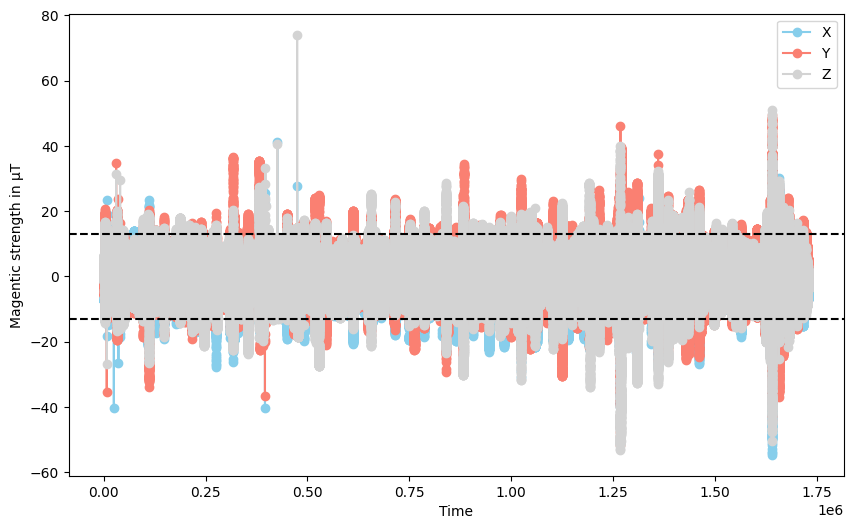

In [16]:
fig, ax = plt.subplots(figsize=(10,6))


ax.plot(clean_train_a.index, clean_train_a['bx_gse'], color= 'skyblue', marker = 'o', label='X')
ax.plot(clean_train_a.index, clean_train_a['by_gse'], color='salmon', marker='o', label='Y')
ax.plot(clean_train_a.index, clean_train_a['bz_gse'], color = 'lightgray', marker='o', label='Z')

ax.axhline(y=higher_threshold, color='black', linestyle='dashed')
ax.axhline(y=lower_threshold, color='black', linestyle = 'dashed')


ax.set_xlabel('Time')
ax.set_ylabel('Magentic strength in μT')


ax.legend()
plt.savefig('plot.png')


### Feature Engineering

In [17]:
clean_train_a.shape

(1575012, 6)

In [18]:
print(f'{higher_threshold} = higher, {lower_threshold} = lower')

13.017637037916273 = higher, -13.017637037916273 = lower


In [19]:
clean_train_a['filtered_x'] = clean_train_a['bx_gse'].where((clean_train_a['bx_gse'] < higher_threshold) & (clean_train_a['bx_gse'] > lower_threshold))

C:\Users\chchr\AppData\Local\Temp\ipykernel_23472\874345451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_train_a['filtered_x'] = clean_train_a['bx_gse'].where((clean_train_a['bx_gse'] < higher_threshold) & (clean_train_a['bx_gse'] > lower_threshold))


In [20]:
filtered_train_a = clean_train_a.dropna()
filtered_train_a.shape

(1562678, 7)

In [21]:
filtered_train_a['Running Mean'] = filtered_train_a['filtered_x'].rolling(window=5).mean()
filtered_train_a.head()

C:\Users\chchr\AppData\Local\Temp\ipykernel_23472\2643667122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_a['Running Mean'] = filtered_train_a['filtered_x'].rolling(window=5).mean()


,period,timedelta,bx_gse,by_gse,bz_gse,Irregular_Activity,filtered_x,Running Mean
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,False,-5.55,NaN
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,False,-5.58,NaN
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,False,-5.15,NaN
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,False,-5.20,NaN
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,False,-5.12,-5.32


In [22]:
filtered_train_a.loc[filtered_train_a['Irregular_Activity'] == True]

,period,timedelta,bx_gse,by_gse,bz_gse,Irregular_Activity,filtered_x,Running Mean
7244,train_a,5 days 00:44:00,11.86,-10.58,-2.53,True,11.86,1.042
7251,train_a,5 days 00:51:00,12.92,6.00,-0.21,True,12.92,2.390
7287,train_a,5 days 01:27:00,11.73,-4.60,0.22,True,11.73,1.134
7421,train_a,5 days 03:41:00,12.55,-3.42,-0.79,True,12.55,4.688
29979,train_a,20 days 19:39:00,12.94,-0.09,-2.48,True,12.94,4.050
...,...,...,...,...,...,...,...,...
1657090,train_a,1150 days 18:10:00,12.42,15.81,14.17,True,12.42,-1.250
1657099,train_a,1150 days 18:19:00,11.44,8.79,19.75,True,11.44,6.230
1701217,train_a,1181 days 09:37:00,11.40,-3.66,-11.66,True,11.40,11.036
1701218,train_a,1181 days 09:38:00,11.36,-2.91,-12.03,True,11.36,11.052


In [23]:
filtered_train_a['Magnitude'] = ((filtered_train_a['bx_gse']**2) + (filtered_train_a['by_gse'] ** 2) + (filtered_train_a['bz_gse'] ** 2)) ** 0.5
filtered_train_a.head()

C:\Users\chchr\AppData\Local\Temp\ipykernel_23472\2251418496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_a['Magnitude'] = ((filtered_train_a['bx_gse']**2) + (filtered_train_a['by_gse'] ** 2) + (filtered_train_a['bz_gse'] ** 2)) ** 0.5


,period,timedelta,bx_gse,by_gse,bz_gse,Irregular_Activity,filtered_x,Running Mean,Magnitude
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,False,-5.55,NaN,6.431563
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,False,-5.58,NaN,6.518504
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,False,-5.15,NaN,6.374998
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,False,-5.20,NaN,6.406622
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,False,-5.12,-5.32,6.324310


In [27]:
filtered_train_a['Runnning Deviation'] = filtered_train_a['filtered_x'].rolling(window=5).std()
filtered_train_a.head()

C:\Users\chchr\AppData\Local\Temp\ipykernel_23472\449195975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_a['Runnning Deviation'] = filtered_train_a['filtered_x'].rolling(window=5).std()


,period,timedelta,bx_gse,by_gse,bz_gse,Irregular_Activity,filtered_x,Running Mean,Magnitude,Runnning Deviation
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,False,-5.55,NaN,6.431563,NaN
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,False,-5.58,NaN,6.518504,NaN
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,False,-5.15,NaN,6.374998,NaN
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,False,-5.20,NaN,6.406622,NaN
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,False,-5.12,-5.32,6.324310,0.225721


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

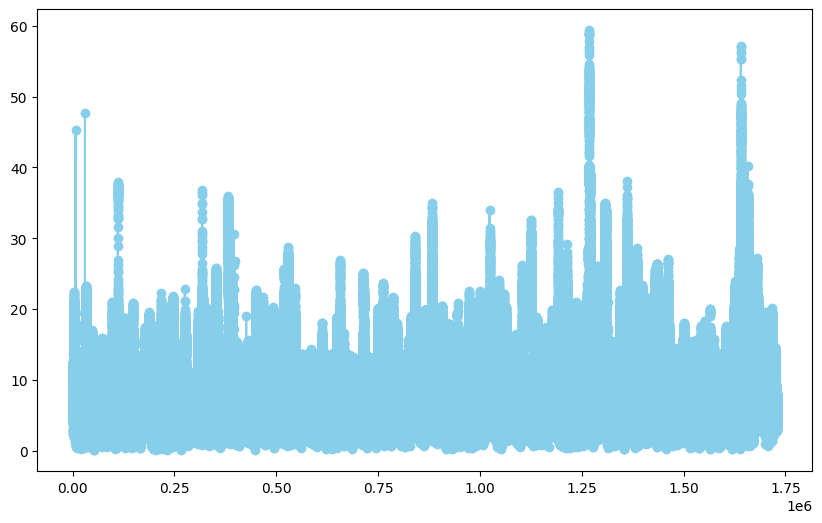

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

mag_high_thresh = 3 * filtered_train_a['Magnitude'] 


ax.plot(filtered_train_a.index, filtered_train_a['Magnitude'], color= 'skyblue', marker = 'o', label='X')

ax.axhline(y=mag_high_thresh, color='black', linestyle='dashed')



ax.set_xlabel('Time')
ax.set_ylabel('Magentic strength in μT')


ax.legend()
plt.savefig('plot.png')

# Main dataset - Logistic Regression Training

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [37]:
filtered_train_a.head()

,period,timedelta,bx_gse,by_gse,bz_gse,Irregular_Activity,filtered_x,Running Mean,Magnitude,Runnning Deviation
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,False,-5.55,NaN,6.431563,NaN
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,False,-5.58,NaN,6.518504,NaN
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,False,-5.15,NaN,6.374998,NaN
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,False,-5.20,NaN,6.406622,NaN
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,False,-5.12,-5.32,6.324310,0.225721


In [38]:
main_dataset = filtered_train_a.drop(['period', 'bx_gse', 'by_gse', 'bz_gse'], axis=1)
main_dataset = main_dataset.dropna()

In [39]:
main_dataset.head()

,timedelta,Irregular_Activity,filtered_x,Running Mean,Magnitude,Runnning Deviation
4,0 days 00:04:00,False,-5.12,-5.320,6.324310,0.225721
5,0 days 00:05:00,False,-4.78,-5.166,6.144144,0.284570
6,0 days 00:06:00,False,-5.15,-5.080,6.265285,0.170147
7,0 days 00:07:00,False,-5.35,-5.120,6.280939,0.209643
8,0 days 00:08:00,False,-5.77,-5.234,6.407956,0.362946


## Data Preprocesing

In [ ]:
def duration_to_minutes(duration_str):
    days_part, time_part = duration_str.split(" days ")
    days = int(days_part)
    hours, minutes, seconds = map(int, time_part.split(":"))
    return days * 24 * 60 + hours * 60 + minutes + seconds // 60


main_dataset['minutes'] = df['timedelta'].apply(duration_to_minutes)
main_dataset = main_dataset.drop(['timedelta'], axis=1)
main_dataset.head()



,Irregular_Activity,filtered_x,Running Mean,Magnitude,Runnning Deviation,minutes
4,False,-5.12,-5.320,6.324310,0.225721,4
5,False,-4.78,-5.166,6.144144,0.284570,5
6,False,-5.15,-5.080,6.265285,0.170147,6
7,False,-5.35,-5.120,6.280939,0.209643,7
8,False,-5.77,-5.234,6.407956,0.362946,8


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(main_dataset)

In [48]:
X_scaled

array([[-0.03076865, -0.82893703, -0.88770148, -0.1895833 , -0.43653199,
        -1.79627183],
       [-0.03076865, -0.74647603, -0.84991483, -0.24267774, -0.32528224,
        -1.7962698 ],
       [-0.03076865, -0.836213  , -0.82881319, -0.20697772, -0.54159111,
        -1.79626777],
       ...,
       [-0.03076865, -0.39965479, -0.47940931, -0.58494775, -0.37143917,
         1.71100377],
       [-0.03076865, -0.38025221, -0.46076135, -0.60801761, -0.27234982,
         1.7110058 ],
       [-0.03076865, -0.37782688, -0.44456707, -0.61524622, -0.21432529,
         1.71100783]], shape=(1562674, 6))